<a href="https://colab.research.google.com/github/aiAdrian/flatland_railway_extension/blob/master/Flatland_Resource_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚂 The Flatland Resource Allocation Demo

Flatland Extension code base:
https://github.com/aiAdrian/flatland_railway_extension/tree/master/flatland_extensions 
 

In [1]:
from IPython.display import clear_output 
clear_output()

In [2]:
!git clone http://gitlab.aicrowd.com/flatland/flatland.git
%cd flatland
!git pull
%cd ..
!pip install -r /content/flatland/requirements_dev.txt &> /dev/null

Cloning into 'flatland'...
remote: Enumerating objects: 17135, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 17135 (delta 59), reused 69 (delta 38), pack-reused 17032
Receiving objects: 100% (17135/17135), 53.27 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (12853/12853), done.
/content/flatland
Already up to date.
/content


In [3]:
!git clone https://github.com/aiAdrian/flatland_railway_extension.git/
%cd flatland_railway_extension
!git pull
%cd ..

Cloning into 'flatland_railway_extension'...
remote: Enumerating objects: 2296, done.
remote: Counting objects: 100% (322/322), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 2296 (delta 197), reused 265 (delta 152), pack-reused 1974
Receiving objects: 100% (2296/2296), 21.98 MiB | 37.20 MiB/s, done.
Resolving deltas: 100% (1469/1469), done.
/content/flatland_railway_extension
Already up to date.
/content


In [4]:
import os
import sys
os.environ['PYTHONPATH'] = "/env/python:/content/flatland:/content/flatland_railway_extension"
if "/content/flatland" not in sys.path:
  sys.path.insert(1, "/content/flatland")
if "/content/flatland_railway_extension" not in sys.path:
  sys.path.insert(1, "/content/flatland_railway_extension")

In [5]:
# import all flatland dependance
import time
import PIL
from IPython.display import display

from flatland.utils.rendertools import RenderTool
from flatland.envs.rail_env_action import RailEnvActions

# import all flatland extensions 
from flatland_railway_extension.FlatlandEnvironmentHelper import FlatlandEnvironmentHelper
from flatland_railway_extension.RailroadSwitchAnalyser import RailroadSwitchAnalyser
from flatland_railway_extension.RailroadSwitchCluster import RailroadSwitchCluster
from flatland_railway_extension.environments.FlatlandResourceAllocator import FlatlandResourceAllocator
from flatland_railway_extension.environments.MultiResourcesAllocationRailEnv import MultiResourcesAllocationRailEnv


In [6]:
def render_env(env):
    env_renderer = RenderTool(env, gl="PGL")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)

In [7]:
 def run_simulation(flatland_environment_helper, railroad_switch_cluster):
    env = flatland_environment_helper.get_rail_env()
    observations, info = env.reset()
 
    for step in range(100):

        flatland_resource_allocator = FlatlandResourceAllocator(env=flatland_environment_helper.get_rail_env())
        flatland_environment_helper.get_rail_env().activate_flatland_resource_allocator(flatland_resource_allocator)
        flatland_environment_helper.get_rail_env().activate_railroad_switch_cluster_locking(railroad_switch_cluster)

        actions = {}
        for agent_handle in flatland_environment_helper.get_rail_env().get_agent_handles():
            obs = observations[agent_handle]
            actions.update({agent_handle: RailEnvActions(obs[0])})

        observations, all_rewards, dones, info = env.step(actions)

        for agent_handle in flatland_environment_helper.get_rail_env().get_agent_handles():
            env = flatland_environment_helper.get_rail_env()
            env.dev_obs_dict.update(
                {agent_handle: flatland_resource_allocator.get_assigned_resources(agent_handle=agent_handle)})
        if step % 10 == 0:
          render_env(env=flatland_environment_helper.get_rail_env())
 
        if dones["__all__"]:
            break  

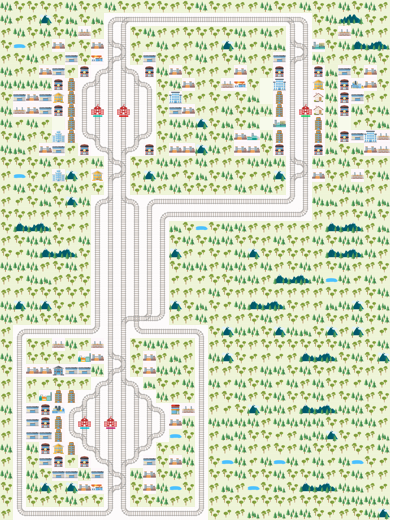

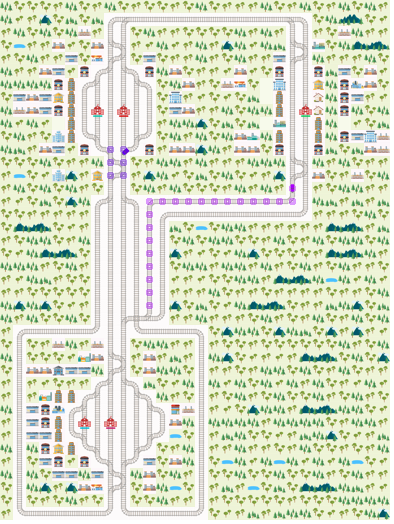

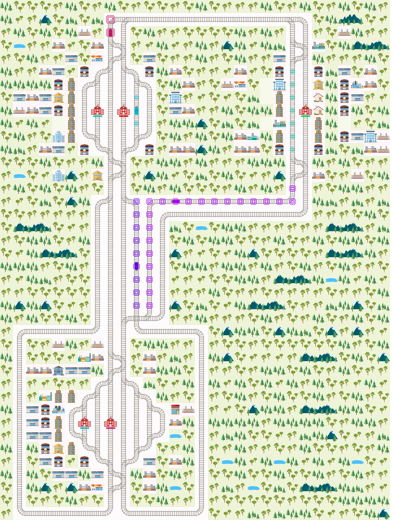

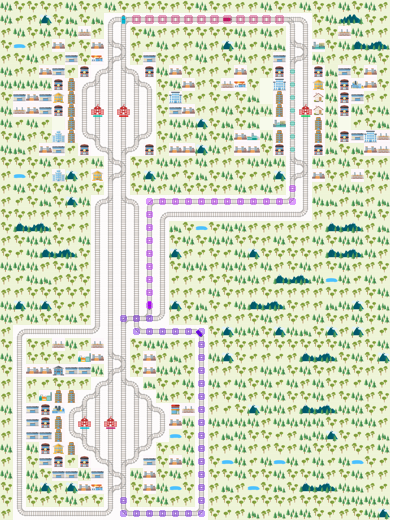

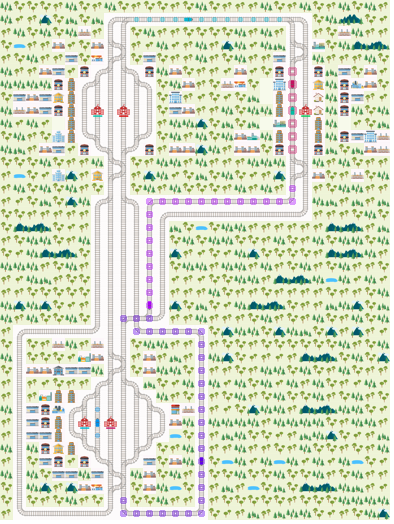

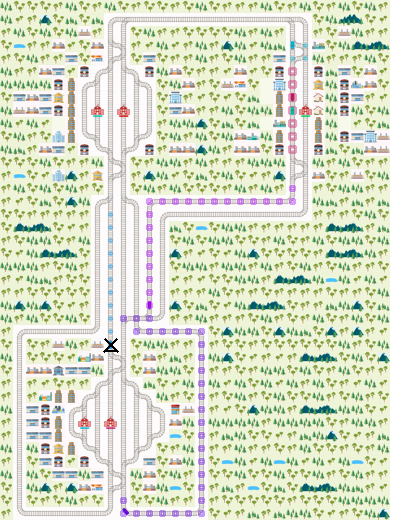

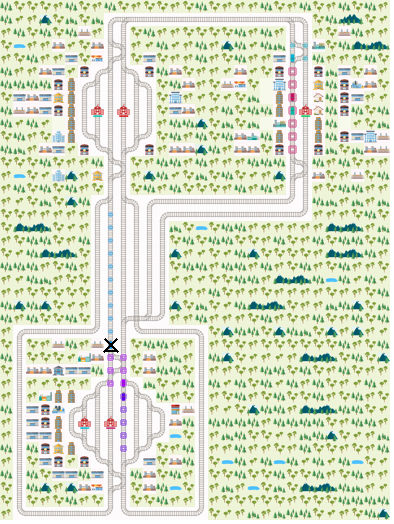

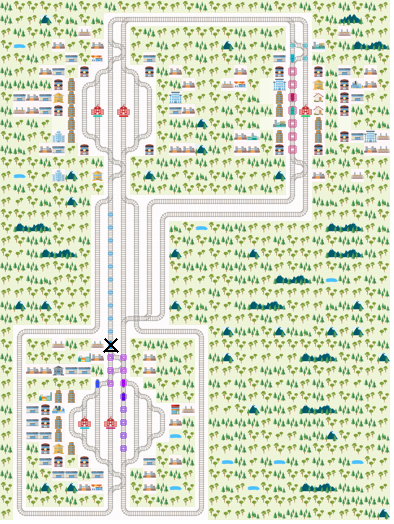

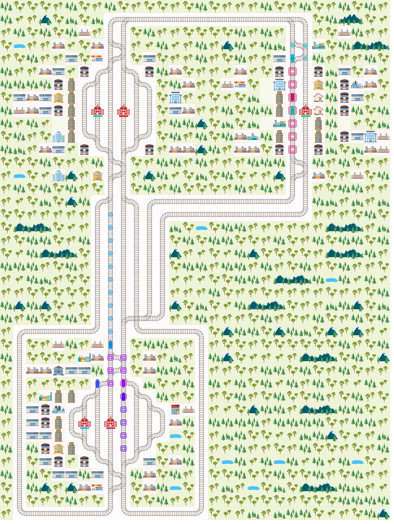

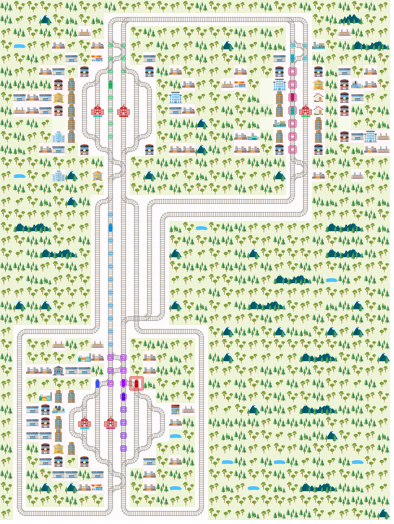

In [8]:
flatland_environment_helper = FlatlandEnvironmentHelper(rail_env=MultiResourcesAllocationRailEnv, random_seed=2341)
railroad_switch_analyser = RailroadSwitchAnalyser(env=flatland_environment_helper.get_rail_env())
railroad_switch_cluster = RailroadSwitchCluster(railroad_switch_analyser=railroad_switch_analyser)

run_simulation(flatland_environment_helper, railroad_switch_cluster)

Author: Adrian Egli